In [42]:
import sys,os
sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath('../modules/'))
import healpy as h
from modules.flat_sky_codes import tangent_plane_analysis as tpa
from modules.flat_sky_codes import flat_sky_analysis as fsa
from modules.masking import gen_masks as gm
from modules.settings import global_mmf_settings as gset
from data_preprocess import tiling_the_sphere as tts

%pylab notebook

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

figpath="../../../../documents/automated_cluster_detection/figures/"

ensure_dir(figpath)

Populating the interactive namespace from numpy and matplotlib


In [43]:
dataset="planck_pr3"
whichch="hfi"
mask_point_sources=False
numprocs=35

if whichch=="allch":
    chmin=30.
elif whichch=="hfi":
    chmin=100.

use_psf_data=True
ps_suffix="_inpainted_data"
if mask_point_sources:
    use_psf_data=False
    ps_suffix="_masked_data"
    
    
figstamp=dataset + "_" + whichch + ps_suffix
dir_suffix=whichch + ps_suffix

save_results=False
run_analysis=False

figstamp,dir_suffix

outpath="/results/" + dataset + "/planck_cosmo_cat_" + dir_suffix + "/"
tempdatapath="/tempdata/" + dataset + "/planck_cosmo_cat/"
gset.setup_mmf_config(dataset=dataset,outpath=outpath,tempdatapath=tempdatapath,chmin=chmin,xsize=15,do_band_pass=True,use_psf_data=use_psf_data)
# figpath=gset.mmfset.paths["result_figs"]

In [32]:
cat=tts.return_tile_definition()
gal_mask=tts.return_zone_mask(nside=512)
fmap,fsky_map,apo_mask=tts.return_sky_tile_map(edge_width=30.,fwhm=30.)

In [57]:
cat["FILENAME"][123]

'/Users/adityarotti/Documents/Work/Projects/Relativistic-SZ/MMF-filters-for-rSZ-cluster-detection/Planck_MMF//tempdata/planck_pr3/planck_cosmo_cat/15deg_patches//tangent_planes/cluster_G129.38+41.81.fits'

In [55]:
tts.gset.mmfset.paths["tplanes"]

'/Users/adityarotti/Documents/Work/Projects/Relativistic-SZ/MMF-filters-for-rSZ-cluster-detection/Planck_MMF//tempdata/planck_pr3/planck_cosmo_cat/15deg_patches//tangent_planes/'

<IPython.core.display.Javascript object>


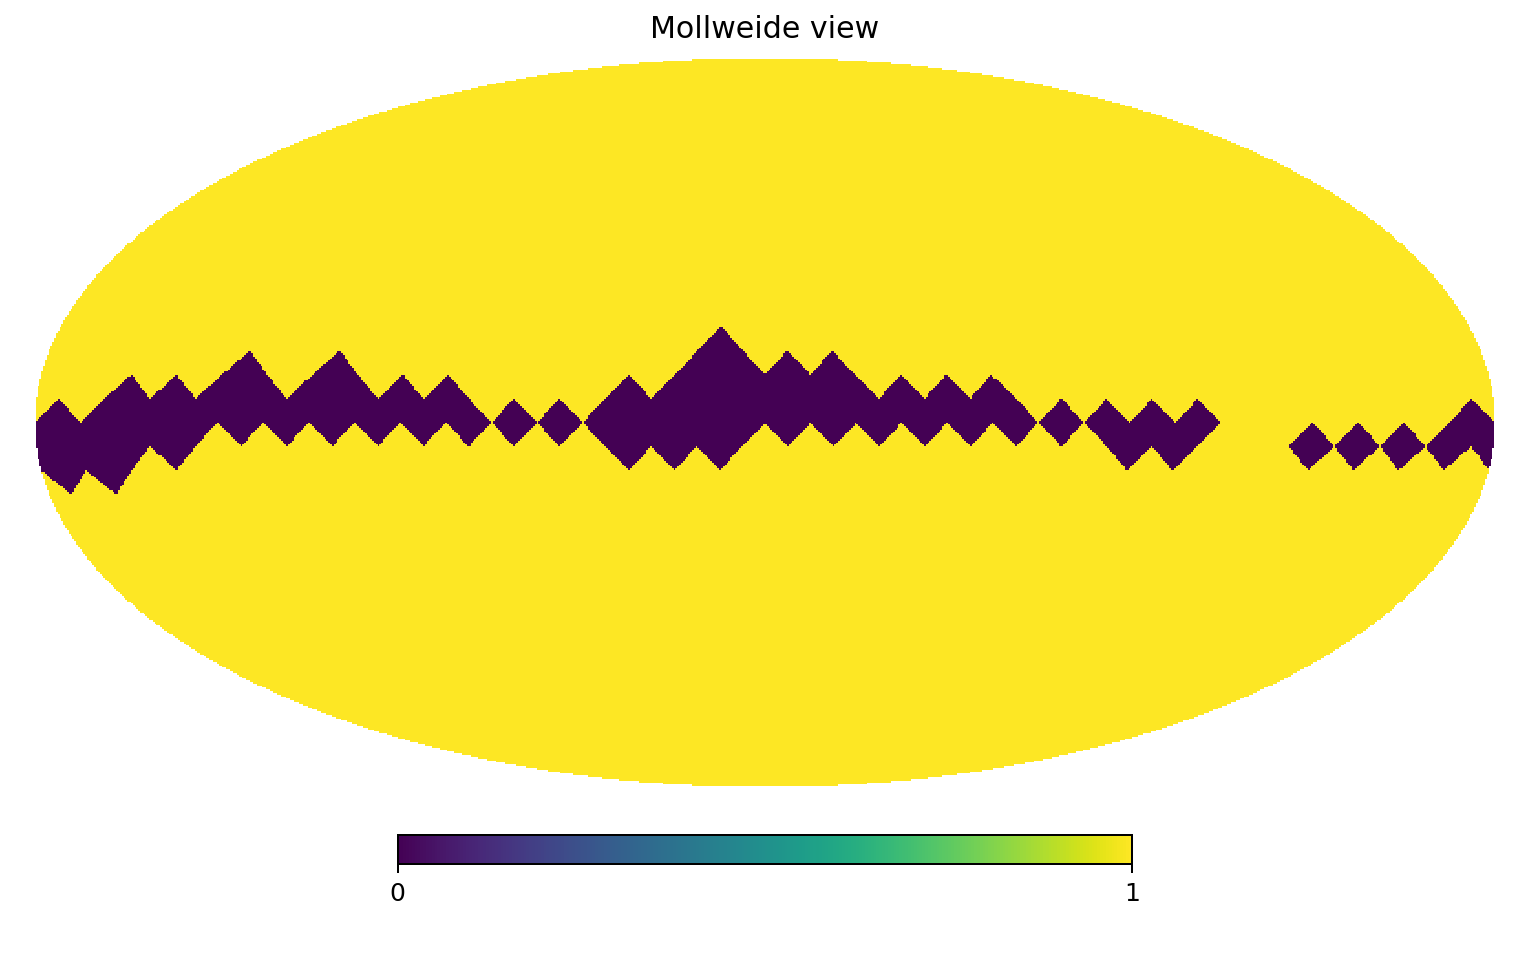

In [52]:
pixnum=np.arange(len(fsky_map))[fsky_map>0.3]
tmap=np.zeros(len(fsky_map))
tmap[pixnum]=1
h.mollview(tmap)

In [54]:
len(pixnum)

702

<IPython.core.display.Javascript object>


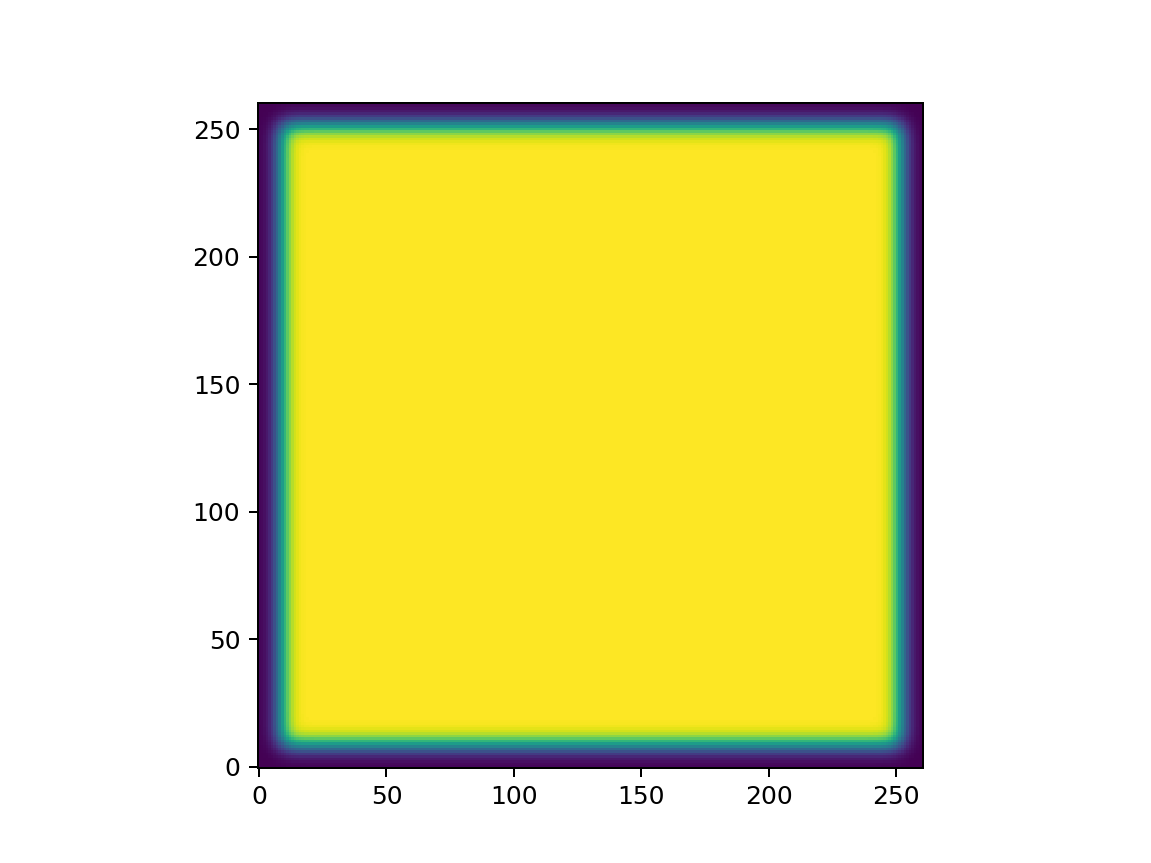

In [44]:
tmap=np.ones_like(apo_mask)
tmap[apo_mask<0.99]=0
figure()
imshow(apo_mask,origin="lower")

<IPython.core.display.Javascript object>


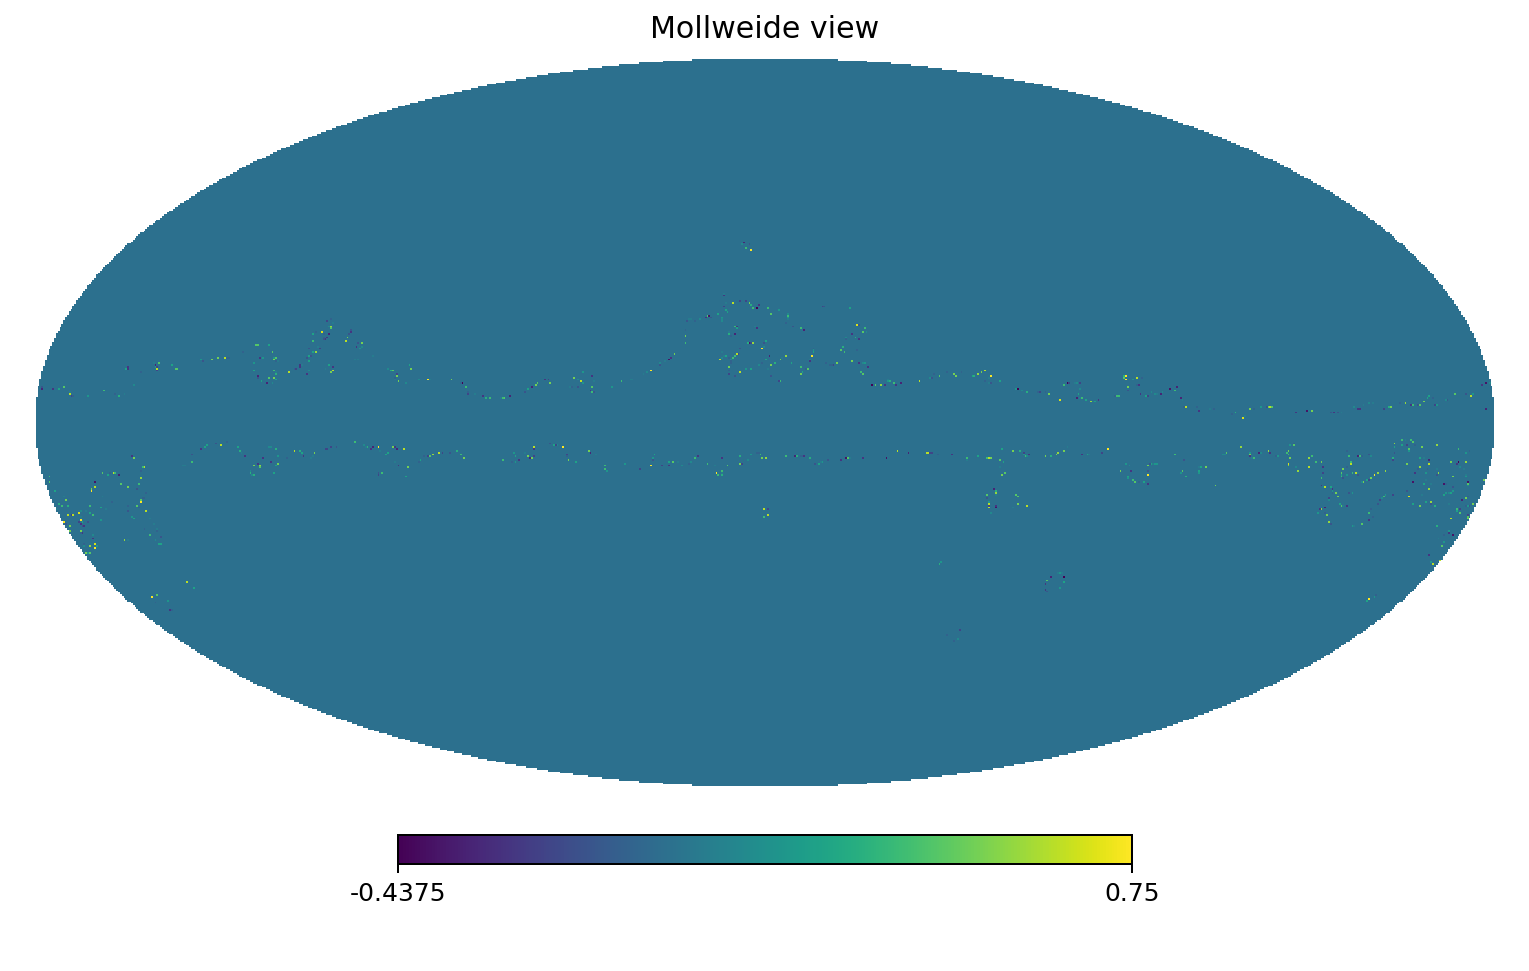

In [45]:
tmap=np.ones_like(fmap)
tmap[fmap<1.]=0
h.mollview(tmap-gal_mask)

<IPython.core.display.Javascript object>


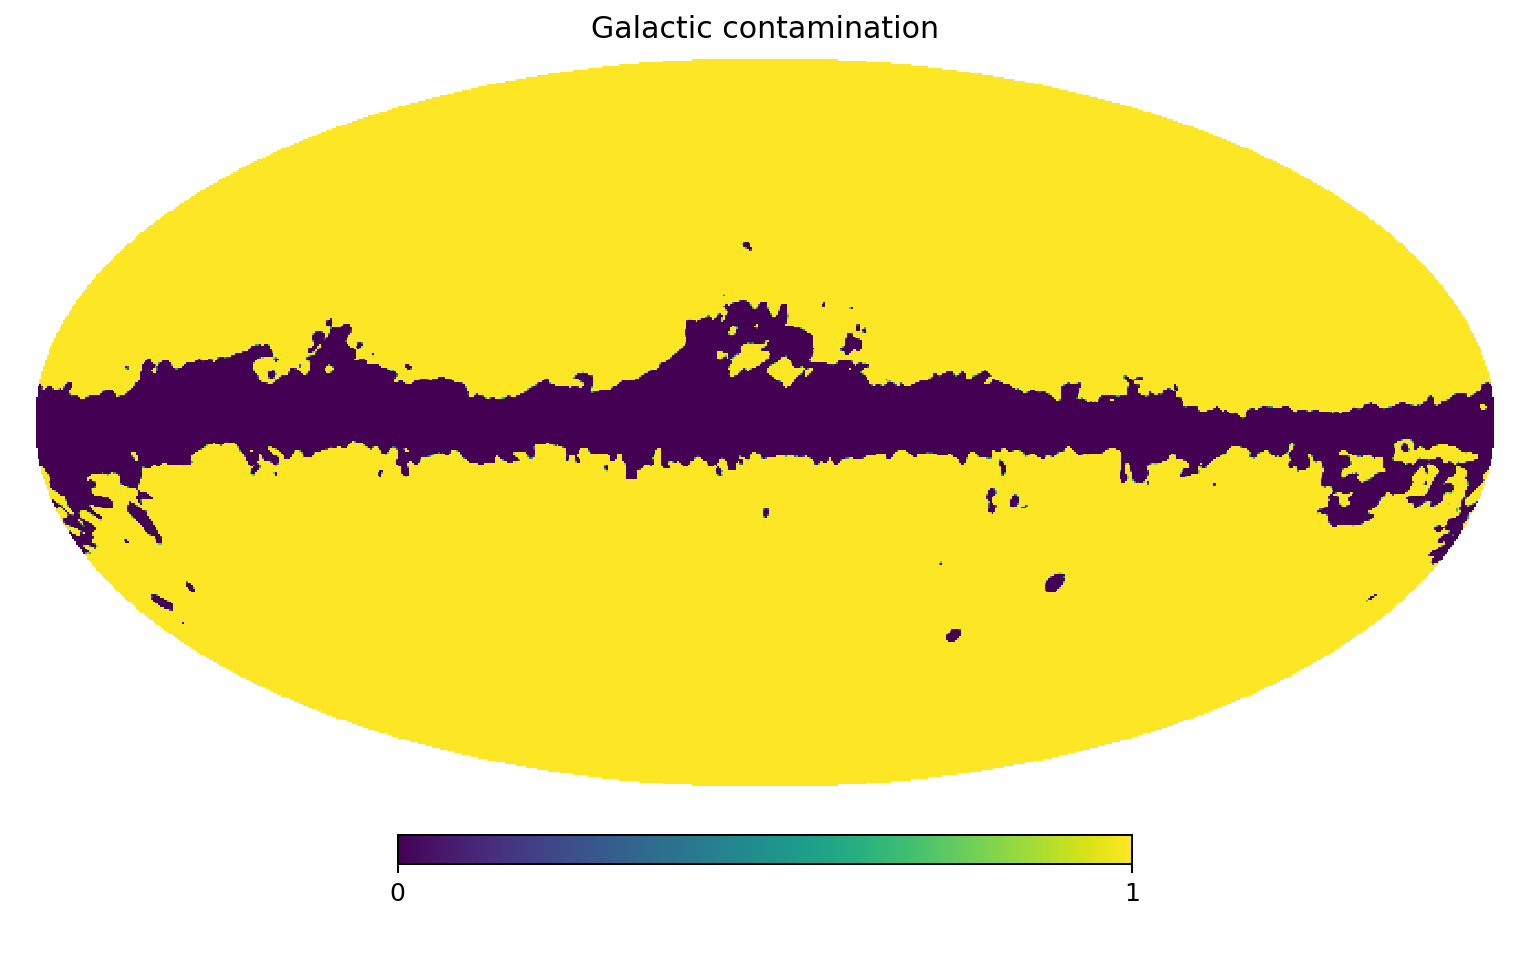

In [50]:
h.mollview(gal_mask,title="Galactic contamination")
filename=figpath + "gal_cont_mask.pdf"
savefig(filename,bbox_inches="tight")

<IPython.core.display.Javascript object>


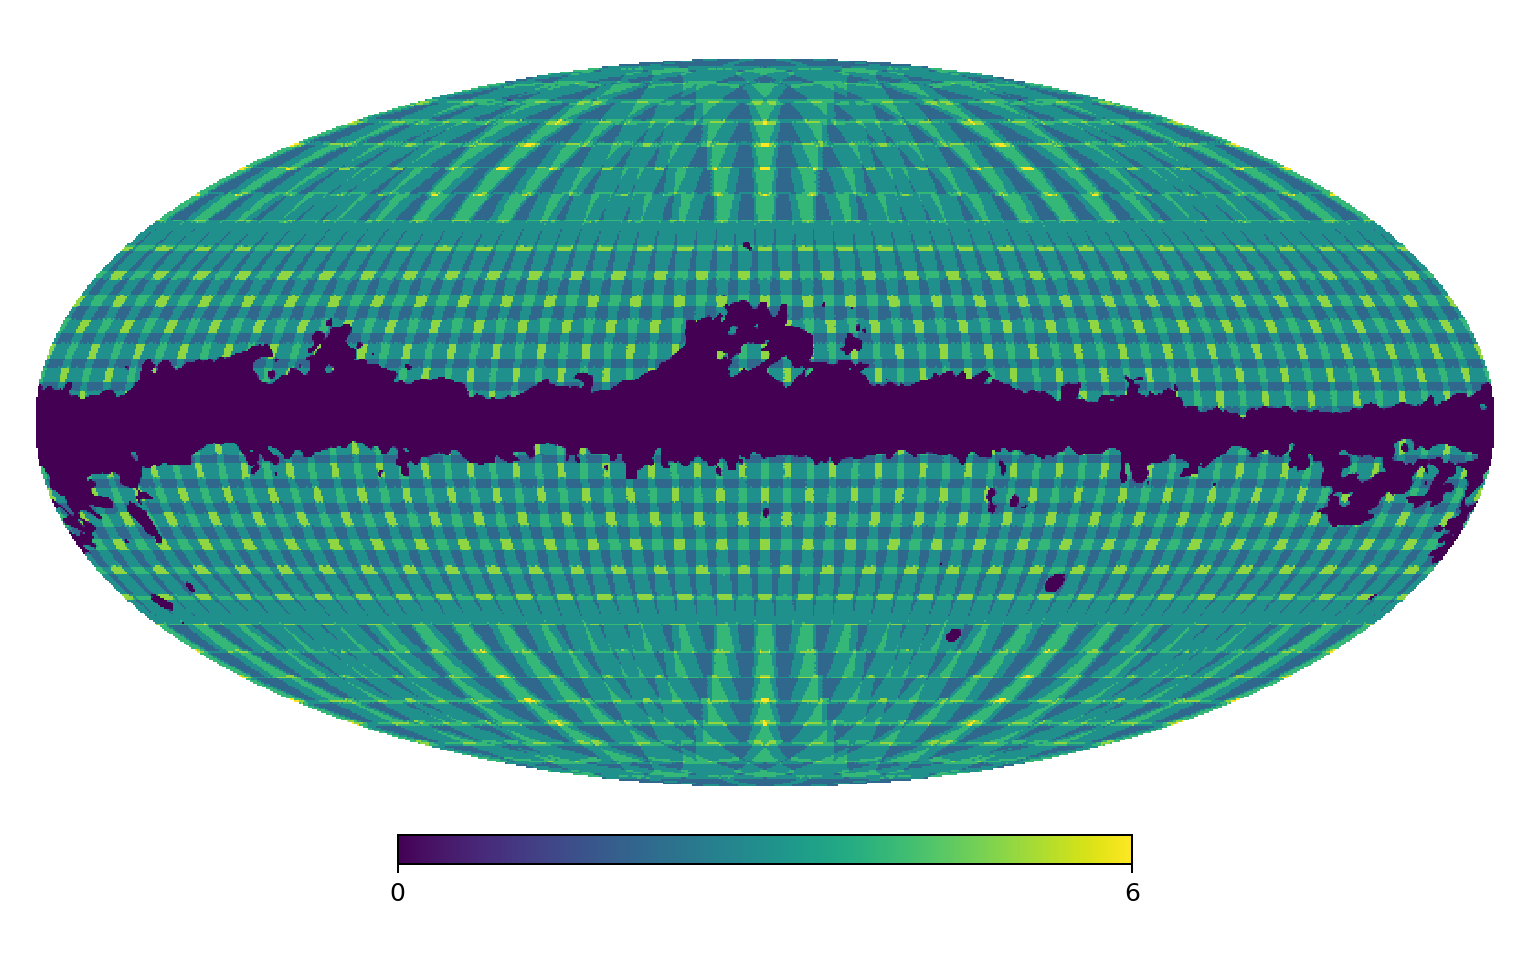

In [47]:
h.mollview(fmap,title="",rot=(0,0))
filename=figpath + "tiled_sky.pdf"
savefig(filename,bbox_inches="tight")

<IPython.core.display.Javascript object>


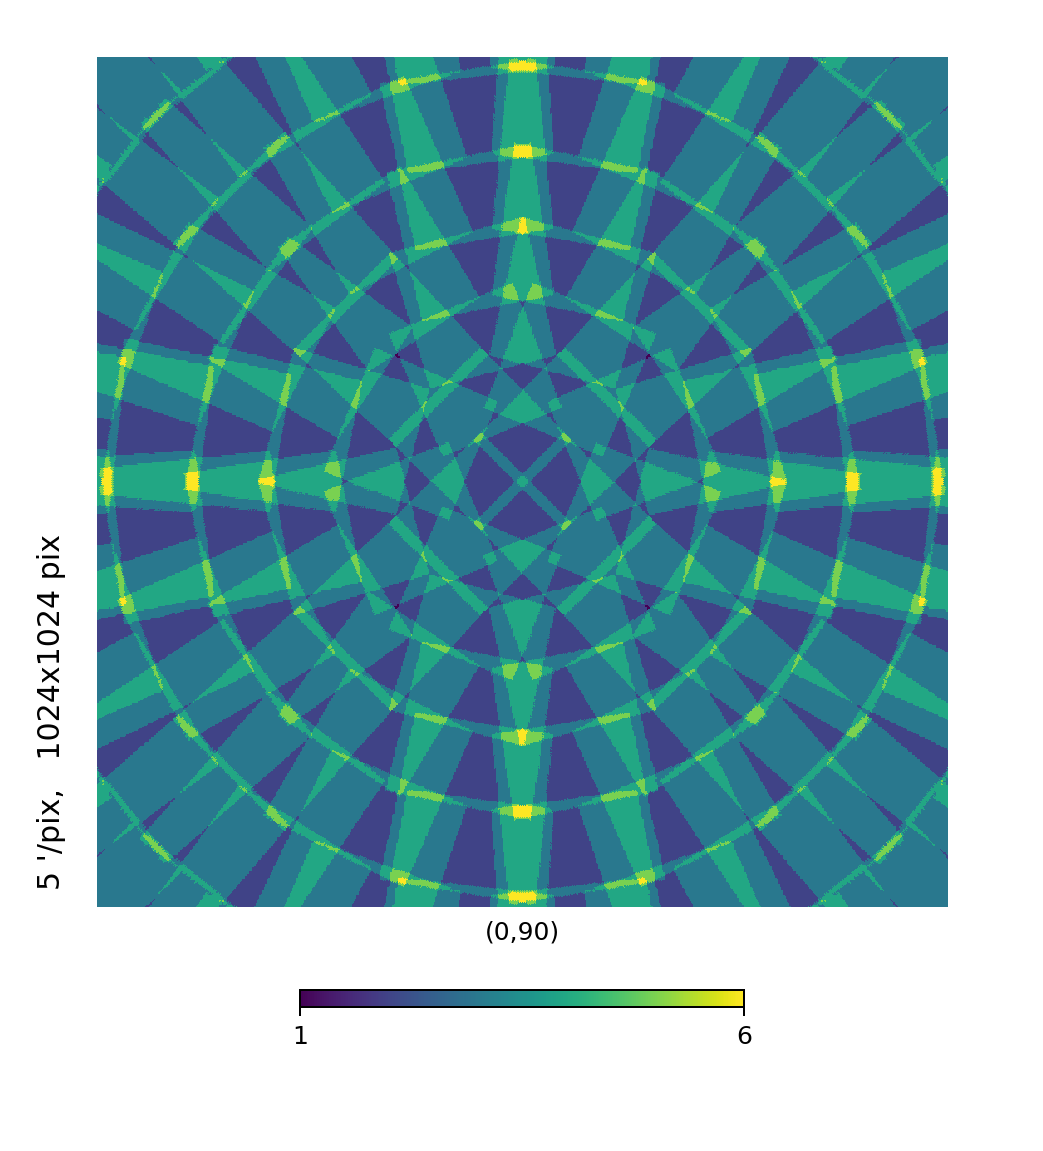

In [48]:
h.gnomview(fmap,xsize=1024,reso=5,rot=(0,90),title="")
filename=figpath + "tiled_sky_npole.pdf"
savefig(filename,bbox_inches="tight")

In [49]:
sum(fmap)/sum(gal_mask)

3.0520756582183663